In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../../pycore/')
from simulate import RBA_result
from utils import extract_details_from_rxnid

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
df_kapp = pd.read_excel('../results/kapp_inPerSec.xlsx')
df_kapp.index = df_kapp.id.to_list()

casesC = pd.read_csv('../input/data_list_clim.txt', sep='\t')
casesC = casesC.data_id.to_list()

casesN = pd.read_csv('../input/data_list_nlim.txt', sep='\t')
casesN = casesN.data_id.to_list()

In [3]:
clim_0 = pd.core.series.Series(dtype='float64')
df = df_kapp.loc[:, casesC]
for i in df.index:
    vals = [v for v in df.loc[i,:] if pd.isnull(v) == False]
    if vals != []:
        clim_0[i] = np.max(vals)
        
nlim_0 = pd.core.series.Series(dtype='float64')
df = df_kapp.loc[:, casesN]
for i in df.index:
    vals = [v for v in df.loc[i,:] if pd.isnull(v) == False]
    if vals != []:
        nlim_0[i] = np.max(vals)

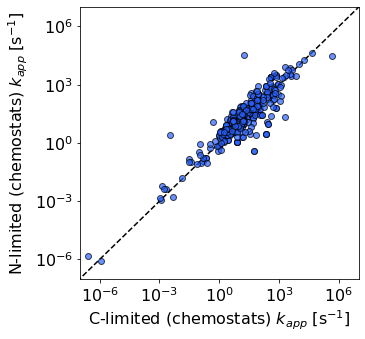

In [4]:
idx = sorted(list(set(clim_0.index) & set(nlim_0.index)))
clim = np.log10(clim_0[idx])
nlim = np.log10(nlim_0[idx])

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(clim, nlim, color='#2962ff', edgecolor='k', alpha=0.7, zorder=1);

lims = [-7, 7]
ticks = [-6, -3, 0, 3, 6]
ticklabels = ['$10^{' + str(i) + '}$' for i in ticks]
ax.set_xlim(lims);
ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels, fontsize=16)
ax.set_ylim(lims);
ax.set_yticks(ticks)
ax.set_yticklabels(ticklabels, fontsize=16)

line = mlines.Line2D([-8, 8], [-8, 8], color='k', linestyle='--', zorder=0)
ax.add_line(line);

ax.set_xlabel('C-limited (chemostats) $k_{app}$ [s$^{-1}$]', fontsize=16);
ax.set_ylabel('N-limited (chemostats) $k_{app}$ [s$^{-1}$]', fontsize=16);

plt.savefig('./figures/kapp_all_Nlim_vs_Clim_scatter.png', transparent=True, bbox_inches='tight')

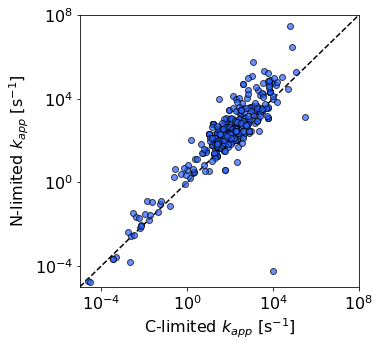

In [11]:
idx = sorted(list(set(clim_0.index) & set(nlim_0.index)))
clim = np.log10(clim_0[idx])
nlim = np.log10(nlim_0[idx])

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(clim, nlim, color='#2962ff', edgecolor='k', alpha=0.7, zorder=1);

lims = [-5,8]
ticks = [-4, 0, 4, 8]
ticklabels = ['$10^{' + str(i) + '}$' for i in ticks]
ax.set_xlim(lims);
ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels, fontsize=16)
ax.set_ylim(lims);
ax.set_yticks(ticks)
ax.set_yticklabels(ticklabels, fontsize=16)

line = mlines.Line2D([-5, 8], [-5, 8], color='k', linestyle='--', zorder=0)
ax.add_line(line);

ax.set_xlabel('C-limited $k_{app}$ [s$^{-1}$]', fontsize=16);
ax.set_ylabel('N-limited $k_{app}$ [s$^{-1}$]', fontsize=16);

plt.savefig('./figures/kapp_all_Nlim_vs_Clim_scatter_onwhite.png',
            transparent=False, facecolor='white', bbox_inches='tight')

In [7]:
clim

ACS_c_FWD          61.136557
PDH_m_FWD        4082.009138
PC_c_FWD          768.816007
ALATA_L_m_REV    1125.687778
ACGAMPM_c_FWD      18.919974
                    ...     
PYDX5PS_c_FWD       0.016024
PYDXK_c_FWD         0.007404
PYDXNO_c_FWD        0.001557
PYAM5PO_c_FWD       0.001281
PYDXO_c_FWD         0.001281
Length: 449, dtype: float64

In [9]:
nlim

ACS_c_FWD         224.951991
PDH_m_FWD        5806.644907
PC_c_FWD         3685.002845
ALATA_L_m_REV    2051.687210
ACGAMPM_c_FWD     196.435296
                    ...     
ACLS_m_FWD        114.671194
IPPS_m_FWD        170.701949
PYDXK_c_FWD         0.008221
PYDXNK_c_FWD        0.005444
PDX5POi_c_FWD       0.004974
Length: 381, dtype: float64